In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from math import pi
from skimage import io

%matplotlib inline
%run "../notebooks/cargar_df.ipynb"

plt.style.use('default')
sns.set(style="whitegrid")
pd.options.display.float_format = '{:20,.2f}'.format

In [2]:
#Cargo el set de datos
train=get_train()

In [3]:
#Inspecciono los formatos de datos para las distintas columnas
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16947 entries, 0 to 16946
Data columns (total 47 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   ID                                  16947 non-null  int16         
 1   Region                              16947 non-null  category      
 2   Territory                           16947 non-null  category      
 3   Pricing, Delivery_Terms_Quote_Appr  16947 non-null  int16         
 4   Pricing, Delivery_Terms_Approved    16947 non-null  int16         
 5   Bureaucratic_Code_0_Approval        16947 non-null  category      
 6   Bureaucratic_Code_0_Approved        16947 non-null  category      
 7   Bureaucratic_Code                   16947 non-null  category      
 8   Account_Created_Date                16947 non-null  datetime64[ns]
 9   Source                              16947 non-null  object        
 10  Billing_Country       

In [4]:
#Visualizo las primeras diez filas del set ,trasponiendolo
train.head(10).T

,0,1,2,3,4,5,6,7,8,9
ID,27761,27760,27446,16808,16805,16802,16799,27455,24353,24355
Region,EMEA,EMEA,Americas,Americas,Americas,Americas,Americas,Americas,Japan,Japan
Territory,None,None,NW America,NW America,NW America,NW America,NW America,NW America,None,None
"Pricing, Delivery_Terms_Quote_Appr",1,0,0,1,1,1,1,1,1,1
"Pricing, Delivery_Terms_Approved",1,0,0,0,0,0,0,1,0,0
Bureaucratic_Code_0_Approval,1,0,0,1,1,1,1,1,0,0
Bureaucratic_Code_0_Approved,1,0,0,0,0,0,0,1,0,0
Bureaucratic_Code,Bureaucratic_Code_4,Bureaucratic_Code_4,Bureaucratic_Code_4,Bureaucratic_Code_5,Bureaucratic_Code_5,Bureaucratic_Code_5,Bureaucratic_Code_5,Bureaucratic_Code_4,Bureaucratic_Code_5,Bureaucratic_Code_5
Account_Created_Date,2015-06-16 00:00:00,2015-06-16 00:00:00,2015-04-21 00:00:00,2013-07-27 00:00:00,2013-07-27 00:00:00,2013-07-27 00:00:00,2013-07-27 00:00:00,2015-04-21 00:00:00,2015-04-20 00:00:00,2015-04-20 00:00:00
Source,None,None,Source_7,Source_11,Source_11,Source_11,Source_11,Source_7,None,None


### Analizo los tipos de estados o "stages" segun las regiones

In [5]:
#Me quedo con las columnas Region y Stage
trainStageTerritory=train.loc[:,["Region","Stage"]]
trainStageTerritory

,Region,Stage
0,EMEA,Closed Lost
1,EMEA,Closed Won
2,Americas,Closed Won
3,Americas,Closed Lost
4,Americas,Closed Lost
...,...,...
16942,EMEA,Closed Won
16943,EMEA,Closed Won
16944,EMEA,Closed Won
16945,Americas,Closed Lost


In [6]:
#Descarto valores de tipo Nan
trainStageTerritory=trainStageTerritory.dropna()

In [7]:
#Agrupo por tipo de Stage para ver segun las regiones como es la distribucion de los distintos "Stages"
trainStageTerritory1=trainStageTerritory.groupby(['Region','Stage']).agg({'Stage':'count'})
trainStageTerritory2=trainStageTerritory1.rename(columns={'Stage':'Total Stage'})
grouped=trainStageTerritory2.unstack()
level0 = grouped.columns.get_level_values(0)
level1 = grouped.columns.get_level_values(1)
grouped.columns = level0 + "_" + level1
grouped1=grouped.reset_index()
grouped2=grouped1.set_index("Region")
grouped2

,Total Stage_Closed Lost,Total Stage_Closed Won,Total Stage_Negotiation,Total Stage_Proposal,Total Stage_Qualification
Region,,,,,
APAC,1355,1896,0,8,3
Americas,2140,1793,8,4,0
EMEA,2189,2471,1,3,0
Japan,1546,3323,1,14,8
Middle East,120,50,8,6,0


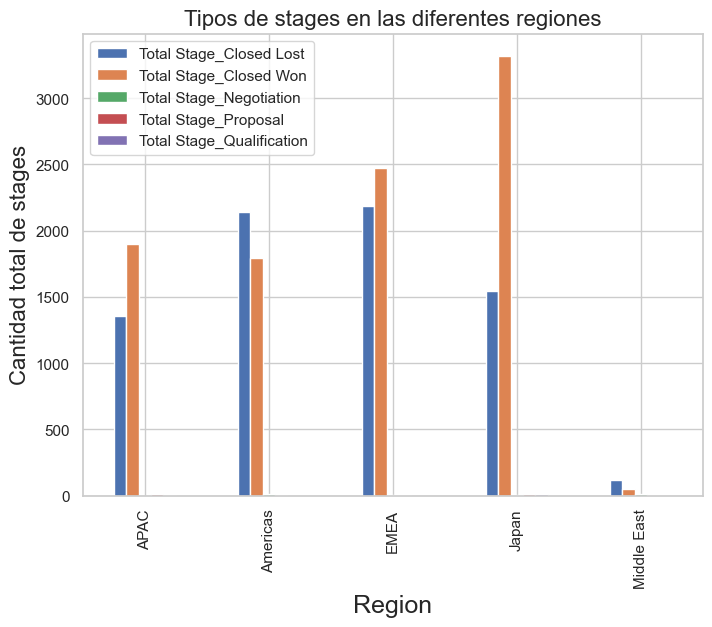

In [8]:
#Grafico el resultado anterior
plot=grouped2.plot(kind='bar', figsize=(8,6))
plot.set_title('Tipos de stages en las diferentes regiones', fontsize=16);
plot.set_xlabel('Region', fontsize=18);
plot.set_ylabel('Cantidad total de stages', fontsize=16);

In [9]:
#Me quedo ahora con el total de stage ganados y perdidos
grouped3=grouped2.loc[:,["Total Stage_Closed Lost","Total Stage_Closed Won"]]
grouped3

,Total Stage_Closed Lost,Total Stage_Closed Won
Region,,
APAC,1355,1896
Americas,2140,1793
EMEA,2189,2471
Japan,1546,3323
Middle East,120,50


In [10]:
#Calculo la relacion en los stages ganados contra los perdidos para las diferentes regiones
grouped3["RatioWonVsLost"]=grouped3["Total Stage_Closed Won"]/grouped3["Total Stage_Closed Lost"]
grouped3

,Total Stage_Closed Lost,Total Stage_Closed Won,RatioWonVsLost
Region,,,
APAC,1355,1896,1.40
Americas,2140,1793,0.84
EMEA,2189,2471,1.13
Japan,1546,3323,2.15
Middle East,120,50,0.42


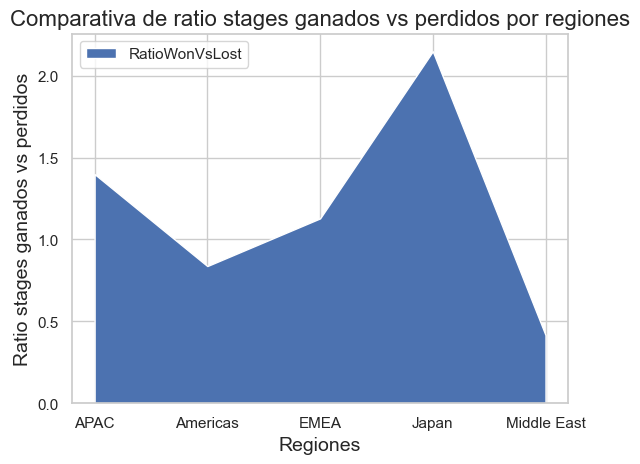

In [11]:
#Grafico el resultado anterior
x=grouped3.index
y=grouped3.loc[:,'RatioWonVsLost']
plt.stackplot(x , y , labels=['RatioWonVsLost'])
plt.legend(loc='upper left')
plt.title('Comparativa de ratio stages ganados vs perdidos por regiones', fontsize=16);
plt.xlabel('Regiones',fontsize=14)
plt.ylabel('Ratio stages ganados vs perdidos',fontsize=14);
plot2=plt
plot2.show()

### Ahora analizo la familia de producto mayor posicionada segun las regiones

In [12]:
#Analizo ahora las distintas familias de porductos ,buscando cuales aparecen mas segun las regiones
trainProd=train.loc[:,["Region","TRF","Product_Family"]]
trainProd2=trainProd.dropna()
trainProd2

,Region,TRF,Product_Family
0,EMEA,10,Product_Family_77
1,EMEA,0,Product_Family_77
2,Americas,0,Product_Family_81
3,Americas,14,Product_Family_209
4,Americas,25,Product_Family_209
...,...,...,...
16942,EMEA,0,Product_Family_85
16943,EMEA,0,Product_Family_85
16944,EMEA,0,Product_Family_85
16945,Americas,4,Product_Family_158


In [13]:
#Agrupo segun Region y Product Family contando el total segun el tipo de familia
trainProd2=trainProd2.groupby(['Region','Product_Family']).agg({'Product_Family':'count'})
trainProd3=trainProd2.rename(columns={'Product_Family':'Total Familia de Producto'})
trainProd3b=trainProd3.sort_values("Total Familia de Producto", ascending=False).head(10)
trainProd3b

Total Familia de Producto
Region   Product_Family                               
Americas Product_Family_133                        663
Japan    Product_Family_77                         585
         Product_Family_226                        524
EMEA     Product_Family_77                         514
         Product_Family_100                        480
Japan    Product_Family_4                          474
EMEA     Product_Family_85                         433
         Product_Family_133                        411
Japan    Product_Family_132                        386
EMEA     Product_Family_109                        381

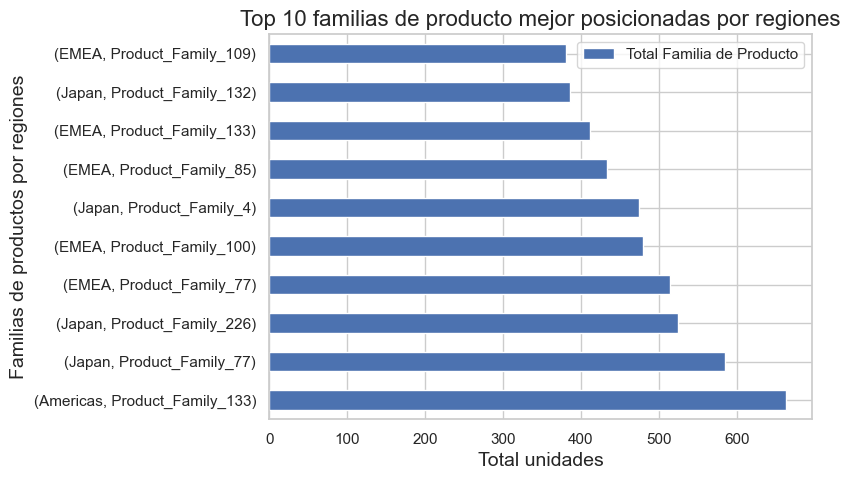

In [14]:
#Grafico el resultado anterior
plot3=trainProd3b.plot(kind='barh', figsize=(7,5));
plot3.set_title('Top 10 familias de producto mejor posicionadas por regiones', fontsize=16);
plot3.set_xlabel('Total unidades', fontsize=14);
plot3.set_ylabel('Familias de productos por regiones', fontsize=14);

### Analizo ahora los tiempos de entrega en stage de tipo "won"

In [21]:
#Me quedo con las columnas Stage ,Region, Opportunity Created Date , Planned Delivery Start Date ,Planned Delivery End Date y Month
trainStageDelivery=train.loc[:,["Stage" ,"Region","Opportunity_Created_Date","Planned_Delivery_Start_Date","Planned_Delivery_End_Date","Month"]]
#trainStageDelivery=train.loc[:,["Stage" ,"Region","Opportunity_Created_Date","Planned_Delivery_Start_Date","Planned_Delivery_End_Date","Actual_Delivery_Date","Month"]]
trainStageDelivery

,Stage,Region,Opportunity_Created_Date,Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Month
0,Closed Lost,EMEA,2015-12-07,2016-05-01,2016-06-30,2016-05-01
1,Closed Won,EMEA,2015-12-07,2016-01-18,2016-01-20,2016-01-01
2,Closed Won,Americas,2015-12-08,2016-01-25,2016-01-25,2016-01-01
3,Closed Lost,Americas,2015-12-08,2018-02-01,2018-03-31,2018-02-01
4,Closed Lost,Americas,2015-12-08,2018-02-01,2018-02-28,2018-02-01
...,...,...,...,...,...,...
16942,Closed Won,EMEA,2015-12-04,2016-03-21,2016-03-25,2016-03-01
16943,Closed Won,EMEA,2015-12-04,2016-04-04,2016-04-08,2016-04-01
16944,Closed Won,EMEA,2015-12-04,2016-03-28,2016-03-31,2016-03-01
16945,Closed Lost,Americas,2015-12-05,2016-04-25,2016-04-29,2016-04-01


In [23]:
#Descarto valores de tipo Nan
trainStageDelivery1=trainStageDelivery.dropna()
trainStageDelivery1

,Stage,Region,Opportunity_Created_Date,Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Month
0,Closed Lost,EMEA,2015-12-07,2016-05-01,2016-06-30,2016-05-01
1,Closed Won,EMEA,2015-12-07,2016-01-18,2016-01-20,2016-01-01
2,Closed Won,Americas,2015-12-08,2016-01-25,2016-01-25,2016-01-01
3,Closed Lost,Americas,2015-12-08,2018-02-01,2018-03-31,2018-02-01
4,Closed Lost,Americas,2015-12-08,2018-02-01,2018-02-28,2018-02-01
...,...,...,...,...,...,...
16942,Closed Won,EMEA,2015-12-04,2016-03-21,2016-03-25,2016-03-01
16943,Closed Won,EMEA,2015-12-04,2016-04-04,2016-04-08,2016-04-01
16944,Closed Won,EMEA,2015-12-04,2016-03-28,2016-03-31,2016-03-01
16945,Closed Lost,Americas,2015-12-05,2016-04-25,2016-04-29,2016-04-01


In [24]:
#En la columna Actual Delivery Date deberian estar las fechas reales de entregas
#Busco alguna fecha de entrega en la columna mencionada 
#trainStageDelivery1.loc[trainStageDelivery["Actual_Delivery_Date"]!='NaT',:]

In [25]:
#Filtro quedandome con los estados de oportunidad de tipo Won
trainEntrega=trainStageDelivery1.loc[trainStageDelivery1['Stage']=='Closed Won',:]
trainEntrega

,Stage,Region,Opportunity_Created_Date,Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Month
1,Closed Won,EMEA,2015-12-07,2016-01-18,2016-01-20,2016-01-01
2,Closed Won,Americas,2015-12-08,2016-01-25,2016-01-25,2016-01-01
7,Closed Won,Americas,2015-12-09,2016-01-25,2016-01-25,2016-01-01
23,Closed Won,APAC,2015-12-09,2016-01-09,2016-01-15,2016-01-01
63,Closed Won,EMEA,2015-12-09,2016-01-18,2016-01-29,2016-01-01
...,...,...,...,...,...,...
16937,Closed Won,EMEA,2015-12-04,2016-02-01,2016-02-29,2016-02-01
16939,Closed Won,EMEA,2015-12-04,2016-04-01,2016-04-21,2016-04-01
16942,Closed Won,EMEA,2015-12-04,2016-03-21,2016-03-25,2016-03-01
16943,Closed Won,EMEA,2015-12-04,2016-04-04,2016-04-08,2016-04-01


In [26]:
trainEntrega1=trainEntrega.copy()

In [27]:
#Analizo la validez de los tiempos
trainEntrega1['difTiempoOk']=trainEntrega1['Month']>trainEntrega1['Opportunity_Created_Date']
trainEntrega1

,Stage,Region,Opportunity_Created_Date,Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Month,difTiempoOk
1,Closed Won,EMEA,2015-12-07,2016-01-18,2016-01-20,2016-01-01,True
2,Closed Won,Americas,2015-12-08,2016-01-25,2016-01-25,2016-01-01,True
7,Closed Won,Americas,2015-12-09,2016-01-25,2016-01-25,2016-01-01,True
23,Closed Won,APAC,2015-12-09,2016-01-09,2016-01-15,2016-01-01,True
63,Closed Won,EMEA,2015-12-09,2016-01-18,2016-01-29,2016-01-01,True
...,...,...,...,...,...,...,...
16937,Closed Won,EMEA,2015-12-04,2016-02-01,2016-02-29,2016-02-01,True
16939,Closed Won,EMEA,2015-12-04,2016-04-01,2016-04-21,2016-04-01,True
16942,Closed Won,EMEA,2015-12-04,2016-03-21,2016-03-25,2016-03-01,True
16943,Closed Won,EMEA,2015-12-04,2016-04-04,2016-04-08,2016-04-01,True


In [28]:
#Calculo las diferencias de tiempos,entre la oportunidad creada y la fecha de entrega asumiendo que se detalla en la columna 
#con rotulo "Month"
trainEntrega1['tiempoTotalEntrega']=trainEntrega1['Month']-trainEntrega1['Opportunity_Created_Date']
trainEntrega1

,Stage,Region,Opportunity_Created_Date,Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Month,difTiempoOk,tiempoTotalEntrega
1,Closed Won,EMEA,2015-12-07,2016-01-18,2016-01-20,2016-01-01,True,25 days
2,Closed Won,Americas,2015-12-08,2016-01-25,2016-01-25,2016-01-01,True,24 days
7,Closed Won,Americas,2015-12-09,2016-01-25,2016-01-25,2016-01-01,True,23 days
23,Closed Won,APAC,2015-12-09,2016-01-09,2016-01-15,2016-01-01,True,23 days
63,Closed Won,EMEA,2015-12-09,2016-01-18,2016-01-29,2016-01-01,True,23 days
...,...,...,...,...,...,...,...,...
16937,Closed Won,EMEA,2015-12-04,2016-02-01,2016-02-29,2016-02-01,True,59 days
16939,Closed Won,EMEA,2015-12-04,2016-04-01,2016-04-21,2016-04-01,True,119 days
16942,Closed Won,EMEA,2015-12-04,2016-03-21,2016-03-25,2016-03-01,True,88 days
16943,Closed Won,EMEA,2015-12-04,2016-04-04,2016-04-08,2016-04-01,True,119 days


In [29]:
#Filtro segun los valores booleanos correspondientes a diferencias de tiempos validos
trainEntrega2=trainEntrega1.loc[trainEntrega1['difTiempoOk']==True,:]
trainEntrega2

,Stage,Region,Opportunity_Created_Date,Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Month,difTiempoOk,tiempoTotalEntrega
1,Closed Won,EMEA,2015-12-07,2016-01-18,2016-01-20,2016-01-01,True,25 days
2,Closed Won,Americas,2015-12-08,2016-01-25,2016-01-25,2016-01-01,True,24 days
7,Closed Won,Americas,2015-12-09,2016-01-25,2016-01-25,2016-01-01,True,23 days
23,Closed Won,APAC,2015-12-09,2016-01-09,2016-01-15,2016-01-01,True,23 days
63,Closed Won,EMEA,2015-12-09,2016-01-18,2016-01-29,2016-01-01,True,23 days
...,...,...,...,...,...,...,...,...
16937,Closed Won,EMEA,2015-12-04,2016-02-01,2016-02-29,2016-02-01,True,59 days
16939,Closed Won,EMEA,2015-12-04,2016-04-01,2016-04-21,2016-04-01,True,119 days
16942,Closed Won,EMEA,2015-12-04,2016-03-21,2016-03-25,2016-03-01,True,88 days
16943,Closed Won,EMEA,2015-12-04,2016-04-04,2016-04-08,2016-04-01,True,119 days


In [30]:
#Agrupo por region y los tiempos totales hasta la entrega
trainEntrega2=trainEntrega2.groupby(['Region','tiempoTotalEntrega']).agg({'tiempoTotalEntrega':'count'})
trainEntrega3=trainEntrega2.rename(columns={'tiempoTotalEntrega':'CantidadTotaldeCasos'})
trainEntrega3b=trainEntrega3.sort_values('CantidadTotaldeCasos', ascending=False).head(10)
trainEntrega3b

CantidadTotaldeCasos
Region tiempoTotalEntrega                      
Japan  1 days                               141
       6 days                                93
       2 days                                91
       9 days                                90
       8 days                                66
       4 days                                63
       3 days                                60
       15 days                               57
APAC   2 days                                55
EMEA   1 days                                53

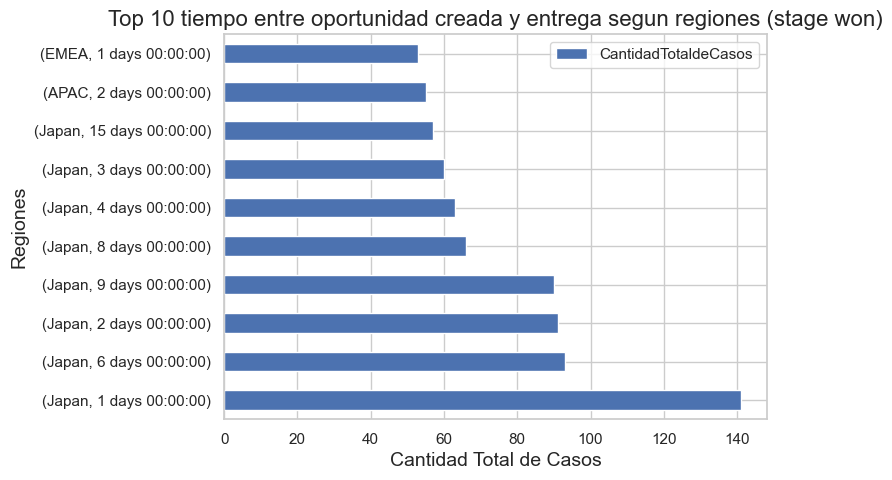

In [58]:
#Grafico el resultado anterior
plot4=trainEntrega3b.plot(kind='barh', figsize=(7,5) )
plot4.set_title('Top 10 tiempo entre oportunidad creada y entrega segun regiones (stage won)', fontsize=16);
plot4.set_xlabel('Cantidad Total de Casos', fontsize=14);
plot4.set_ylabel('Regiones', fontsize=14);

In [55]:
trainEntrega4=trainEntrega1.copy()
trainEntrega4

,Stage,Region,Opportunity_Created_Date,Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Month,difTiempoOk,tiempoTotalEntrega
1,Closed Won,EMEA,2015-12-07,2016-01-18,2016-01-20,2016-01-01,True,25 days
2,Closed Won,Americas,2015-12-08,2016-01-25,2016-01-25,2016-01-01,True,24 days
7,Closed Won,Americas,2015-12-09,2016-01-25,2016-01-25,2016-01-01,True,23 days
23,Closed Won,APAC,2015-12-09,2016-01-09,2016-01-15,2016-01-01,True,23 days
63,Closed Won,EMEA,2015-12-09,2016-01-18,2016-01-29,2016-01-01,True,23 days
...,...,...,...,...,...,...,...,...
16937,Closed Won,EMEA,2015-12-04,2016-02-01,2016-02-29,2016-02-01,True,59 days
16939,Closed Won,EMEA,2015-12-04,2016-04-01,2016-04-21,2016-04-01,True,119 days
16942,Closed Won,EMEA,2015-12-04,2016-03-21,2016-03-25,2016-03-01,True,88 days
16943,Closed Won,EMEA,2015-12-04,2016-04-04,2016-04-08,2016-04-01,True,119 days


In [33]:
#Filtro segun los valores booleanos correspondientes a diferencias de tiempos validos
trainEntrega4b=trainEntrega4.loc[trainEntrega4['difTiempoOk']==True,:]
trainEntrega4b

,Stage,Region,Opportunity_Created_Date,Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Month,difTiempoOk,tiempoTotalEntrega
1,Closed Won,EMEA,2015-12-07,2016-01-18,2016-01-20,2016-01-01,True,25 days
2,Closed Won,Americas,2015-12-08,2016-01-25,2016-01-25,2016-01-01,True,24 days
7,Closed Won,Americas,2015-12-09,2016-01-25,2016-01-25,2016-01-01,True,23 days
23,Closed Won,APAC,2015-12-09,2016-01-09,2016-01-15,2016-01-01,True,23 days
63,Closed Won,EMEA,2015-12-09,2016-01-18,2016-01-29,2016-01-01,True,23 days
...,...,...,...,...,...,...,...,...
16937,Closed Won,EMEA,2015-12-04,2016-02-01,2016-02-29,2016-02-01,True,59 days
16939,Closed Won,EMEA,2015-12-04,2016-04-01,2016-04-21,2016-04-01,True,119 days
16942,Closed Won,EMEA,2015-12-04,2016-03-21,2016-03-25,2016-03-01,True,88 days
16943,Closed Won,EMEA,2015-12-04,2016-04-04,2016-04-08,2016-04-01,True,119 days


In [34]:
trainEntrega4c=trainEntrega4b.loc[:,['Region','Month','Planned_Delivery_Start_Date','Planned_Delivery_End_Date']]
trainEntrega4c

,Region,Month,Planned_Delivery_Start_Date,Planned_Delivery_End_Date
1,EMEA,2016-01-01,2016-01-18,2016-01-20
2,Americas,2016-01-01,2016-01-25,2016-01-25
7,Americas,2016-01-01,2016-01-25,2016-01-25
23,APAC,2016-01-01,2016-01-09,2016-01-15
63,EMEA,2016-01-01,2016-01-18,2016-01-29
...,...,...,...,...
16937,EMEA,2016-02-01,2016-02-01,2016-02-29
16939,EMEA,2016-04-01,2016-04-01,2016-04-21
16942,EMEA,2016-03-01,2016-03-21,2016-03-25
16943,EMEA,2016-04-01,2016-04-04,2016-04-08


In [35]:
trainEntrega4d=trainEntrega4c.copy()

In [45]:
trainEntrega4d['difTiempoMaxEntregaPlaneadaVsReal']=(trainEntrega4c['Month']-trainEntrega4c['Planned_Delivery_End_Date'])
trainEntrega4d

,Region,Month,Planned_Delivery_Start_Date,Planned_Delivery_End_Date,difTiempoMaxEntregaPlaneadaVsReal,difTiempoMinEntregaPlaneadaVsReal
1,EMEA,2016-01-01,2016-01-18,2016-01-20,-19 days,17 days
2,Americas,2016-01-01,2016-01-25,2016-01-25,-24 days,24 days
7,Americas,2016-01-01,2016-01-25,2016-01-25,-24 days,24 days
23,APAC,2016-01-01,2016-01-09,2016-01-15,-14 days,8 days
63,EMEA,2016-01-01,2016-01-18,2016-01-29,-28 days,17 days
...,...,...,...,...,...,...
16937,EMEA,2016-02-01,2016-02-01,2016-02-29,-28 days,0 days
16939,EMEA,2016-04-01,2016-04-01,2016-04-21,-20 days,0 days
16942,EMEA,2016-03-01,2016-03-21,2016-03-25,-24 days,20 days
16943,EMEA,2016-04-01,2016-04-04,2016-04-08,-7 days,3 days


In [46]:
trainEntrega4d['difTiempoMinEntregaPlaneadaVsReal']=(trainEntrega4d['Month']-trainEntrega4d['Planned_Delivery_Start_Date'])
trainEntrega4d

,Region,Month,Planned_Delivery_Start_Date,Planned_Delivery_End_Date,difTiempoMaxEntregaPlaneadaVsReal,difTiempoMinEntregaPlaneadaVsReal
1,EMEA,2016-01-01,2016-01-18,2016-01-20,-19 days,-17 days
2,Americas,2016-01-01,2016-01-25,2016-01-25,-24 days,-24 days
7,Americas,2016-01-01,2016-01-25,2016-01-25,-24 days,-24 days
23,APAC,2016-01-01,2016-01-09,2016-01-15,-14 days,-8 days
63,EMEA,2016-01-01,2016-01-18,2016-01-29,-28 days,-17 days
...,...,...,...,...,...,...
16937,EMEA,2016-02-01,2016-02-01,2016-02-29,-28 days,0 days
16939,EMEA,2016-04-01,2016-04-01,2016-04-21,-20 days,0 days
16942,EMEA,2016-03-01,2016-03-21,2016-03-25,-24 days,-20 days
16943,EMEA,2016-04-01,2016-04-04,2016-04-08,-7 days,-3 days


In [47]:
#Agrupo por region y las diferencias de tiempos entre entrega real y entrega maxima planeada
trainEntrega5=trainEntrega4d.groupby(['Region','difTiempoMaxEntregaPlaneadaVsReal']).agg({'difTiempoMaxEntregaPlaneadaVsReal':'count'})
trainEntrega5b=trainEntrega5.rename(columns={'difTiempoMaxEntregaPlaneadaVsReal':'total_casos'})
trainEntrega5c=trainEntrega5b.sort_values('total_casos', ascending=False).head(10)
trainEntrega5c

total_casos
Region difTiempoMaxEntregaPlaneadaVsReal             
APAC   -30 days                                   258
EMEA   -30 days                                   201
APAC   -29 days                                   181
EMEA   -29 days                                   160
Japan  0 days                                     124
       -9 days                                    118
       -4 days                                    117
EMEA   -28 days                                   103
Japan  -3 days                                     99
       -1 days                                     98

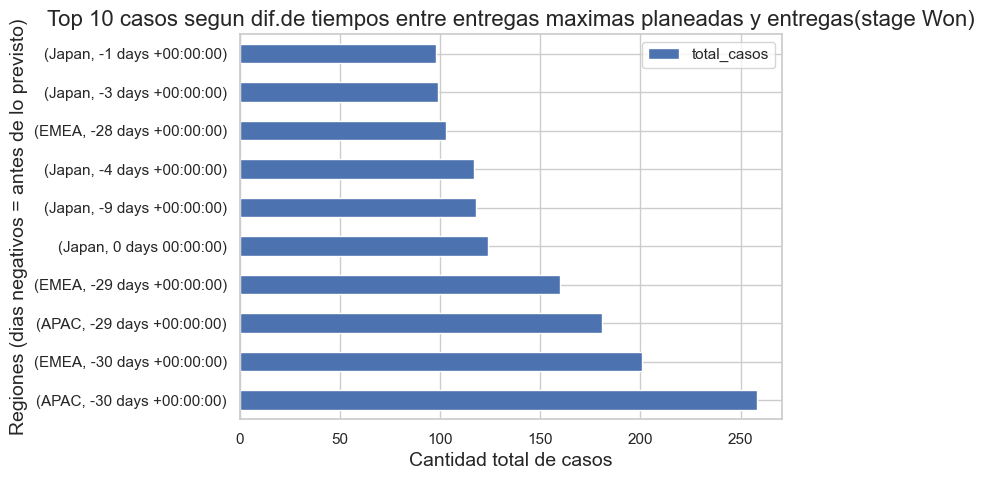

In [50]:
#Grafico el resultado anterior
plot5=trainEntrega5c.plot(kind='barh', figsize=(7,5) )
plot5.set_title('Top 10 casos segun dif.de tiempos entre entregas maximas planeadas y entregas(stage Won)', fontsize=16);
plot5.set_xlabel('Cantidad total de casos', fontsize=14);
plot5.set_ylabel('Regiones (dias negativos = antes de lo previsto)', fontsize=14);

In [51]:
#Agrupo por region y las diferencias de tiempos entre entrega real y entrega minima planeada
trainEntrega6=trainEntrega4d.groupby(['Region','difTiempoMinEntregaPlaneadaVsReal']).agg({'difTiempoMinEntregaPlaneadaVsReal':'count'})
trainEntrega6b=trainEntrega6.rename(columns={'difTiempoMinEntregaPlaneadaVsReal':'total_casos'})
trainEntrega6c=trainEntrega6b.sort_values('total_casos', ascending=False).head(10)
trainEntrega6c

total_casos
Region   difTiempoMinEntregaPlaneadaVsReal             
APAC     0 days                                     419
EMEA     0 days                                     274
Americas 0 days                                     170
Japan    0 days                                     158
         -4 days                                    121
         -9 days                                    119
         -3 days                                    104
         -1 days                                    102
         -10 days                                    98
EMEA     -1 days                                     98

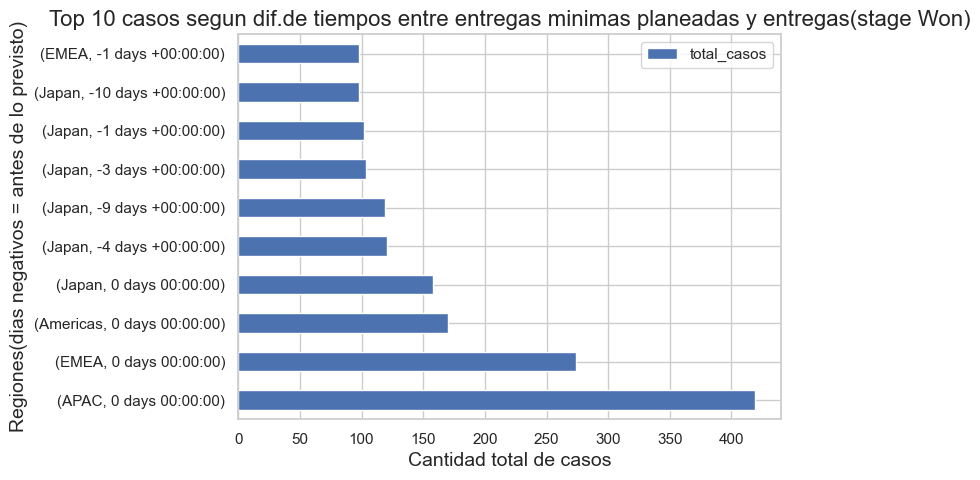

In [53]:
#Grafico el resultado anterior
plot6=trainEntrega6c.plot(kind='barh', figsize=(7,5) )
plot6.set_title('Top 10 casos segun dif.de tiempos entre entregas minimas planeadas y entregas(stage Won)', fontsize=16);
plot6.set_xlabel('Cantidad total de casos', fontsize=14);
plot6.set_ylabel('Regiones(dias negativos = antes de lo previsto)', fontsize=14);